    Department Of Computer Science
    COMP4381, SP.TOP: DATA SCIENCE AND ANALYTICS
    Dr. Hussein Soboh
    COMP4381 | Section 1 


## <div align=center> Assignment #5 </div>
<div align=center><b>Analyis of a UK-based online retail transactions </b></div>
<div align=center>Occurring between 01/12/2009 and 09/12/2011</div>

    Prepeared by: Sondos Aabed   
    ID: 1190652

#### <b>Table of Contents</b>
- <b>Introduction</b>
    - About this dataset
- <b>Objectives</b>
- <b>Software Listenings</b>
- <b>Dataset Analysis</b>
- <b>Conclusion</b>

#### <b>List of Figures</b>
- Figure 0: 
- Figure 1: 
- Figure 2: 
- Figure 3:
- Figure 4: 

#### <b>List of Tables</b>
- Table 1: 
- Table 2: 

<hr>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from wordcloud import WordCloud

## Loading Data and Sampling

In [52]:
def read_sample(sample_size = 200000, path='./online_retail_II.csv', seed = 1190652):
    """
    Read a csv file into dataframe and take a sample
    Args:
        path (str): the path of the dataset takes a deafult value (relative path)
        seed (int): the seed for randomness so each time it have the same random selcetd
    Returns:
        sample (pd.Dataframe): sample taken from the read df with specific seed
    """
    df = pd.read_csv(path)
    sample = df.sample(sample_size, random_state=seed)
    return sample

In [53]:
sample = read_sample()

## Dataset Exploration

In [54]:
def missing_values(df):
    """
    This is to get the percetages of missing data
    Args:
        df (pd.Dataframe): contains the data
    Returns:
        missing_percetanges(pd.Dataframe): contains Column,	Counts, and	Percentage
            of the missing values for eah colmn
    """
    missing_count = df.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': missing_count.values / len(df) * 100  
    })
    return  missing_percetanges

In [55]:
def explore_sample(sample):
    """
    Exploring a dataset sample
    Args:
        sample (pd.Dataframe): the dataset sample to explore.
    Returns:
        results (dict): containing results of each exploration with the title as key
    """
    head = pd.DataFrame(sample.head())
    tail = pd.DataFrame(sample.tail())
    nunique = pd.DataFrame(sample.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(sample.describe())
    isna =  pd.DataFrame(sample.isna().sum(), columns=["#_of_IsNa"])
    dtypes =  pd.DataFrame(sample.dtypes, columns=["Datatype"])
    sem = pd.DataFrame(sample.sem(numeric_only= True), columns=['SEM'])
    results = {
        'Table 1: Dataset Head:':head,
        'Table 2: Dataset Tail:':tail,
        'Table 3: Dataset Numerical Describtion: ':describe,
        'Table 4: Missing Values By Percentage': missing_values(sample), 
        'Table 5: Dataset Columns Data types: ':dtypes,
        'Table 6: Number of uniques in the datasets:':nunique,
        'Table 7: Is Na for datasets':isna,
        'Table 8: Standard Error of Means for numerical columns: ':sem}
    return results

In [56]:
def print_sample_exploration(results):
    """
    Prints a beautufil display of each of the exploration dataframe
    Args:
        results (dict): contains exploration outputs with the title as key
    Returns:
        nothing
    """
    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Missing Values':
            print("Total Sum of Missing Percetange: ", dataframe['Percentage'].sum())
        display(dataframe)

In [57]:
results = explore_sample(sample)
print_sample_exploration(results)

Table 1: Dataset Head:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
803443,561203,22953,BIRTHDAY PARTY CORDON BARRIER TAPE,12,2011-07-25 15:17:00,1.25,14232.0,United Kingdom
607418,543182,22726,ALARM CLOCK BAKELIKE GREEN,3,2011-02-04 10:40:00,7.46,NaN,United Kingdom
117428,500567,47586A,PINK FAIRY CAKE CUSHION COVER,24,2010-03-08 15:49:00,0.85,13694.0,United Kingdom
299616,518570,35961,FOLKART ZINC HEART CHRISTMAS DEC,1,2010-08-10 11:49:00,1.66,NaN,United Kingdom
613909,543803,22525,CHILDRENS GARDEN GLOVES PINK,5,2011-02-13 12:05:00,1.25,17126.0,United Kingdom


Table 2: Dataset Tail:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
107865,499765,21916,SET 12 RETRO WHITE CHALK STICKS,1,2010-03-02 13:15:00,0.81,NaN,United Kingdom
1000423,576857,23102,SILVER HEARTS TABLE DECORATION,2,2011-11-16 15:52:00,0.83,12748.0,United Kingdom
827091,563350,22111,SCOTTIE DOG HOT WATER BOTTLE,2,2011-08-15 14:10:00,4.95,14498.0,United Kingdom
553404,538576,21187,WHITE BELL HONEYCOMB PAPER GARLAND,2,2010-12-13 11:29:00,1.65,14498.0,United Kingdom
47491,493817,21306,SET/4 DAISY MIRROR MAGNETS,6,2010-01-07 12:22:00,2.10,16641.0,United Kingdom


Table 3: Dataset Numerical Describtion: 


,Quantity,Price,Customer ID
count,200000.000000,200000.000000,154545.000000
mean,9.487405,4.505168,15324.988269
std,185.044141,128.357150,1695.690684
min,-74215.000000,-44031.790000,12346.000000
25%,1.000000,1.250000,13975.000000
50%,3.000000,2.100000,15251.000000
75%,10.000000,4.130000,16797.000000
max,12960.000000,18910.690000,18287.000000


Table 4: Missing Values By Percentage


,Column,Counts,Percentage
0,Invoice,0,0.0000
1,StockCode,0,0.0000
2,Description,818,0.4090
3,Quantity,0,0.0000
4,InvoiceDate,0,0.0000
5,Price,0,0.0000
6,Customer ID,45455,22.7275
7,Country,0,0.0000


Table 5: Dataset Columns Data types: 


,Datatype
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
Price,float64
Customer ID,float64
Country,object


Table 6: Number of uniques in the datasets:


,#_of_Unique
Invoice,36313
StockCode,4698
Description,5043
Quantity,533
InvoiceDate,33985
Price,1009
Customer ID,5575
Country,43


Table 7: Is Na for datasets


,#_of_IsNa
Invoice,0
StockCode,0
Description,818
Quantity,0
InvoiceDate,0
Price,0
Customer ID,45455
Country,0


Table 8: Standard Error of Means for numerical columns: 


,SEM
Quantity,0.413771
Price,0.287015
Customer ID,4.313394


## Handle Date and Get total Price per inovice

In [58]:
def handle_date(sample):
    """ 
    Handles date high cardenality
    Args: 
        sample (pd.Dataframe): contains datset
    Return:
        (pd.Dataframe) handeled with day, month, year and time columns added
    """    
    sample['InvoiceDate'] = pd.to_datetime(sample['InvoiceDate'])
    sample['InvoiceYear'] = sample['InvoiceDate'].dt.year
    sample['InvoiceMonth'] = sample['InvoiceDate'].dt.month
    sample['InvoiceDay'] = sample['InvoiceDate'].dt.day
    sample['InvoiceTime'] = sample['InvoiceDate'].dt.time
    sample = sample.drop('InvoiceDate', axis=1)
    return sample

In [59]:
def get_total(row):
    """
    Calcualtes the total prices by multiplication and considering quantity
    Args:
        row of the dataframe
    Returns:
        Total price  that is calculated by multiplication of Quantity*Price 
    """
    return row["Quantity"] * row["Price"]

In [60]:
sample = handle_date(sample)
sample['total_price'] = sample.apply(get_total, axis=1)
sample.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,total_price
803443,561203,22953,BIRTHDAY PARTY CORDON BARRIER TAPE,12,1.25,14232.0,United Kingdom,2011,7,25,15:17:00,15.00
607418,543182,22726,ALARM CLOCK BAKELIKE GREEN,3,7.46,NaN,United Kingdom,2011,2,4,10:40:00,22.38
117428,500567,47586A,PINK FAIRY CAKE CUSHION COVER,24,0.85,13694.0,United Kingdom,2010,3,8,15:49:00,20.40
299616,518570,35961,FOLKART ZINC HEART CHRISTMAS DEC,1,1.66,NaN,United Kingdom,2010,8,10,11:49:00,1.66
613909,543803,22525,CHILDRENS GARDEN GLOVES PINK,5,1.25,17126.0,United Kingdom,2011,2,13,12:05:00,6.25


## Visualization

Text(0, 0.5, 'Number of Invoices')

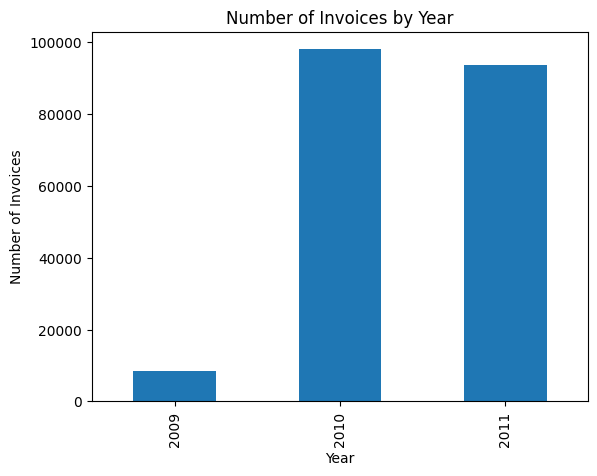

In [61]:
sample['InvoiceYear'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Invoices by Year')
plt.xlabel('Year')
plt.ylabel('Number of Invoices')

Text(0, 0.5, 'Number of Invoices')

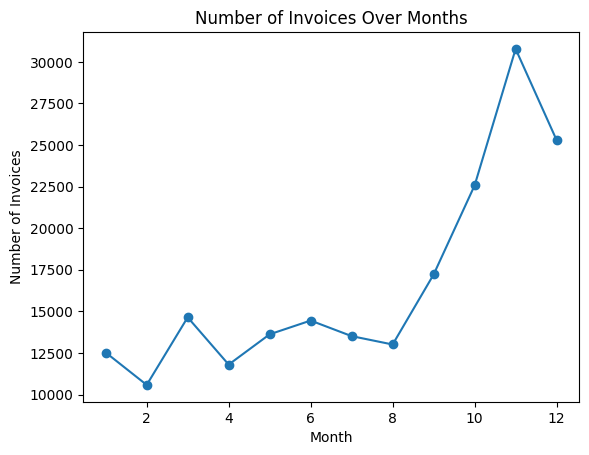

In [62]:
sample.groupby('InvoiceMonth')['Invoice'].count().plot(marker='o')
plt.title('Number of Invoices Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')

(-0.5, 399.5, 199.5, -0.5)

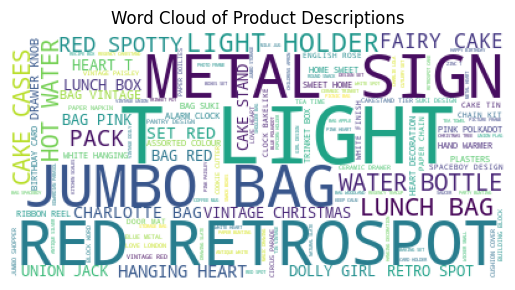

In [63]:
words = ' '.join(sample['Description'].dropna())
wordcloud = WordCloud(background_color='white').generate(words)
plt.imshow(wordcloud)
plt.title('Word Cloud of Product Descriptions')
plt.axis('off')

## 

In [ ]:
hourly_sales = sample.groupby('InvoiceTime')['total_price'].sum()
peak_sales_hour = hourly_sales.idxmax()
print(f"The peak sales hour is at {peak_sales_hour} o'clock.")

1. Determine the total sales per invoice and identify the top 5 invoices.

In [64]:
sample['total_price'].groupby(sample['Invoice']).sum().head()

Invoice
489434     30.00
489435     30.60
489436    190.30
489437     42.75
489439     89.25
Name: total_price, dtype: float64

2. Compute the total sales per customer and list the top 5 customers.

3. Identify the top 5 selling items during this period.

4. Determine the most frequently purchased item pairs by customers and display the top 20 pairs.

5. The retail store aims to introduce a new promotion targeting items with low sales volume. This promotion entails offering a discounted price for a pair of two different items, with one item being among the top 10 best sellers and the other from the bottom 10 sellers. Customers who purchase these two items together will qualify for the special pricing. Your task is to recommend 10 pairs of items to kickstart this campaign.